<a href="https://colab.research.google.com/github/Sidhtang/30-day-ml-challenge-/blob/main/DAY_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# text classification
#goal is to make classifier that classifies anger or joy

In [2]:
! pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requi

In [3]:
from datasets import load_dataset
emotions = load_dataset("emotion")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [4]:
emotions


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:

train_ds = emotions["train"]
train_ds



Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [6]:
len(train_ds)

16000

In [7]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [8]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [9]:
print(train_ds[:5])


{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [10]:
print(train_ds["text"][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [11]:
import pandas as pd
df = emotions['train'][:]


In [12]:
def label_int2str(row):
 return emotions["train"].features["label"].int2str(row)

In [13]:
!pip install lists

  Preparing metadata (setup.py) ... done
  Created wheel for lists: filename=lists-1.3.0-py3-none-any.whl size=1393 sha256=c5614599081f0c5cda5b6d829d6a840c69b8082dad7a2971dfcafb2d8a876dfb
  Stored in directory: /root/.cache/pip/wheels/1a/88/39/e66a100d55a85e13efcbe3e7a52269b2269971c75135a5b237
Successfully built lists


In [14]:
import pandas as pd

# Assuming 'emotions' is a dictionary-like object with a 'train' key
# and the value associated with 'train' has a 'label' key
df = pd.DataFrame(emotions['train'])  # Convert to DataFrame

def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)  # Now apply works on a Series
print(df.head())

                                                text  label label_name
0                            i didnt feel humiliated      0    sadness
1  i can go from feeling so hopeless to so damned...      0    sadness
2   im grabbing a minute to post i feel greedy wrong      3      anger
3  i am ever feeling nostalgic about the fireplac...      2       love
4                               i am feeling grouchy      3      anger


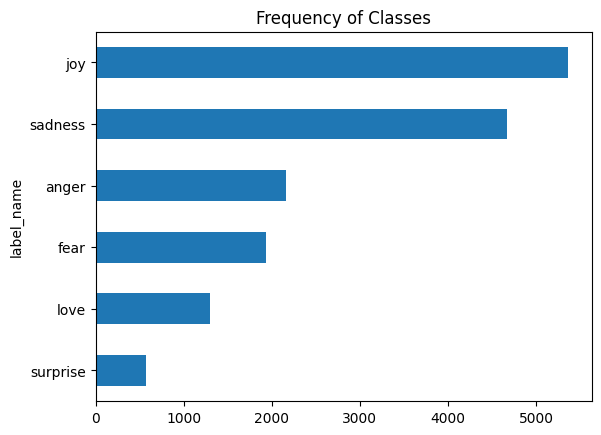

In [15]:
import matplotlib.pyplot as plt
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

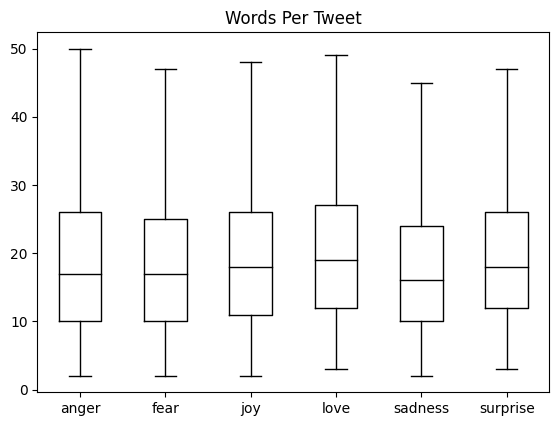

In [16]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,
 showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [17]:
#Transformer models like DistilBERT cannot receive raw strings as input; instead, they
##assume the text has been tokenized and encoded as numerical vectors. Tokenization is
#the step of breaking down a string into the atomic units used in the model.

In [18]:
#character tokeniztion
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)
#numerical encoding call numericalisation
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)


['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']
{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [19]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [20]:
#SUBWORD TOKENIZATION
#The basic idea behind subword tokenization is to combine the best aspects of charac‐
#ter and word tokenization

In [21]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [22]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [23]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)


['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [24]:
tokenizer.vocab_size

30522

In [25]:
tokenizer.model_max_length
tokenizer.model_input_names


['input_ids', 'attention_mask']

In [26]:
#To tokenize the whole corpus, we’ll use the map() method of our DatasetDict object.
def tokenize(batch):
 return tokenizer(batch["text"], padding=True, truncation=True)

In [27]:
print(tokenize(emotions["train"][:2]))


{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [28]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [29]:
print(emotions_encoded["train"].column_names)


['text', 'label', 'input_ids', 'attention_mask']


In [30]:
# training a text classifier
#token encodings-token embends - encoder stack - hidden states- classification heads- prediction
# 1 feature extraction
#2 fine tuneing

In [31]:
import transformers
from transformers import AutoModel

In [32]:
import torch

In [33]:
model_ckpt = "distilbert-base-uncased"  # Correct model name
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [34]:
#AutoModel class converts the token encodings to embeddings, and then feeds
#them through the encoder stack to return the hidden states

In [35]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")


Input tensor shape: torch.Size([1, 6])


In [36]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
 outputs = model(**inputs)
print(outputs)


BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [37]:
outputs.last_hidden_state.size()


torch.Size([1, 6, 768])

In [38]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}


In [39]:
emotions_encoded.set_format("torch",
 columns=["input_ids", "attention_mask", "label"])

In [40]:
emotions_encoded.map(extract_hidden_states , batched = True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [41]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

In [42]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [43]:
#Now that we have the hidden states associated with each tweet, the next step is to
#train a classifier on them

In [44]:
# creating a feature matrix

In [45]:
import numpy as np
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [46]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.2 MB/s eta 0:00:00


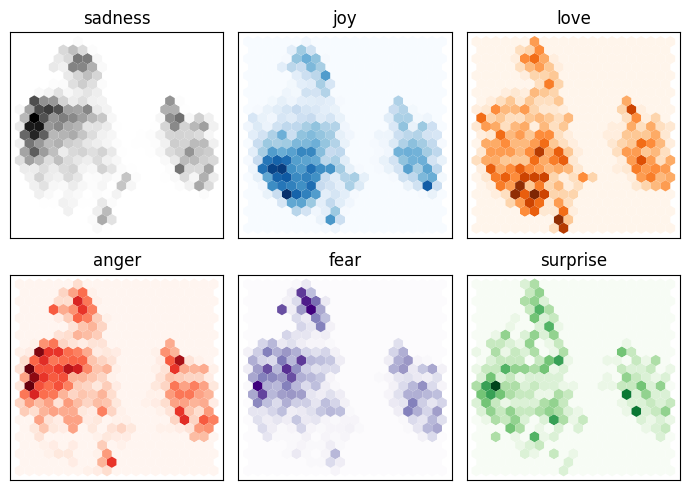

In [47]:
# visualising the training set
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
 df_emb_sub = df_emb.query(f"label == {i}")
 axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
 gridsize=20, linewidths=(0,))
 axes[i].set_title(label)
 axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()
















In [59]:
# training the classifier
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [54]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

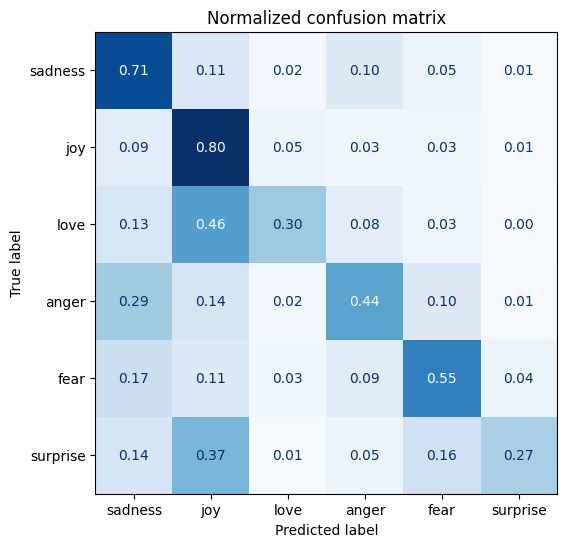

In [58]:
# training the classifier
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train) # Fit the model to the training data

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
 cm = confusion_matrix(y_true, y_preds, normalize="true")
 fig, ax = plt.subplots(figsize=(6, 6))
 disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
 disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
 plt.title("Normalized confusion matrix")
 plt.show()
y_preds = lr_clf.predict(X_valid) # Now you can predict and evaluate
plot_confusion_matrix(y_preds, y_valid, labels)

In [51]:
# @title fine tuning the model
from transformers import AutoModelForSequenceClassification

# Define the model checkpoint you want to use
model_ckpt = "bert-base-uncased"  # Example: Replace with your desired model

num_labels = 6
device = "cuda" if torch.cuda.is_available() else "cpu"  # Define device

model = (AutoModelForSequenceClassification
 .from_pretrained(model_ckpt, num_labels=num_labels)
 .to(device))

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [52]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
 labels = pred.label_ids
 preds = pred.predictions.argmax(-1)
 f1 = f1_score(labels, preds, average="weighted")
 acc = accuracy_score(labels, preds)
 return {"accuracy": acc, "f1": f1}

In [66]:
from huggingface_hub import notebook_login
notebook_login()

In [67]:
from transformers import Trainer, TrainingArguments
batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
 num_train_epochs=2,
learning_rate=2e-5,
per_device_train_batch_size=batch_size,
per_device_eval_batch_size=batch_size,
weight_decay=0.01,
evaluation_strategy="epoch",
 disable_tqdm=False,
 logging_steps=logging_steps,
 push_to_hub=True,
log_level="error")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [68]:
from transformers import Trainer
trainer = Trainer(model=model, args=training_args,
 compute_metrics=compute_metrics,
 train_dataset=emotions_encoded["train"],
 eval_dataset=emotions_encoded["validation"],
 tokenizer=tokenizer)
trainer.train();



Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.762100,0.252130,0.913000,0.913866
2,0.197900,0.180997,0.926000,0.926081


In [69]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [70]:
preds_output.metrics


{'test_loss': 0.1809968501329422,
 'test_accuracy': 0.926,
 'test_f1': 0.9260808932516992,
 'test_runtime': 8.2469,
 'test_samples_per_second': 242.514,
 'test_steps_per_second': 3.88}

In [71]:
y_preds = np.argmax(preds_output.predictions, axis=1)

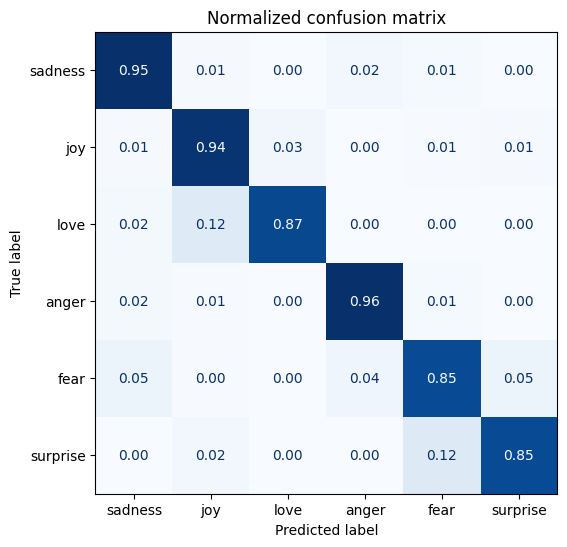

In [72]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [73]:
#error analysis of the model
from torch .nn.functional import cross_entropy
def forward_pass_with_label(batch):
 # Place model inputs on the GPU
 inputs = {k:v.to(device) for k,v in batch.items()
 if k in tokenizer.model_input_names}
 with torch.no_grad():
  output= model(**inputs)
  pred_label= torch.argmax(output.logits, axis=1)
  loss = cross_entropy(output.logits, batch["label"].to(device),reduction = 'none')
  return {"loss": loss.cpu().numpy(),
          "predicted_label": pred_label.cpu().numpy()}




In [75]:
# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",
 columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(
 forward_pass_with_label, batched=True, batch_size=16)
#Finally, we create a DataFrame with the texts, losses, and predicted/true labels:
#emotions_encoded.set_format("pandas")
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
 .apply(label_int2str))


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [76]:
#Let’s first have a look at the data samples with the highest losses:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1963,i called myself pro life and voted for perry w...,joy,sadness,6.270390
882,i feel badly about reneging on my commitment t...,love,sadness,5.529722
177,im sure much of the advantage is psychological...,sadness,joy,5.496194
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.361807
188,i was going to tell you more about my trip to ...,sadness,joy,4.967249
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.722589
1801,i feel that he was being overshadowed by the s...,love,sadness,4.620276
1509,i guess this is a memoir so it feels like that...,joy,fear,4.366697
580,i just feel very cheated and quite frightened ...,fear,sadness,4.178740
1836,i got a very nasty electrical shock when i was...,fear,anger,4.036008


In [77]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
1090,i dont know what it is about me and sweets the...,joy,joy,0.009086
908,i said earlier that the overall feeling is joy...,joy,joy,0.009299
1561,i came to tv stations for first debut stage i ...,joy,joy,0.009375
1223,i feel ok about this work because it is not so...,joy,joy,0.009581
845,i already feel very glamorous have a great day...,joy,joy,0.009722
137,i feel like it will not be as good if i do it ...,joy,joy,0.009724
455,i was doing okay even done some enclosed seams...,joy,joy,0.009745
1020,i feel that the content i have in mind isnt re...,joy,joy,0.009790
1291,im on a double at work i wasnt feeling overly ...,joy,joy,0.009829
1528,i am feeling a little happy with him,joy,joy,0.009829


In [78]:
trainer.push_to_hub(commit_message="Training completed!")

events.out.tfevents.1723395767.23649f314802.1802.0:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/sidhtang/bert-base-uncased-finetuned-emotion/commit/58d844dc84a278bc2f61d8aa6ea019ef35320230', commit_message='Training completed!', commit_description='', oid='58d844dc84a278bc2f61d8aa6ea019ef35320230', pr_url=None, pr_revision=None, pr_num=None)

In [81]:
from transformers import pipeline

In [83]:
from transformers import pipeline
# Change `transformersbook` to your Hub username
model_id = 'sidhtang/bert-base-uncased-finetuned-emotion'
classifier = pipeline("text-classification", model=model_id)

config.json:   0%|          | 0.00/995 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [84]:
custom_tweet = "I saw a movie today and it was really bad."
preds = classifier(custom_tweet, return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


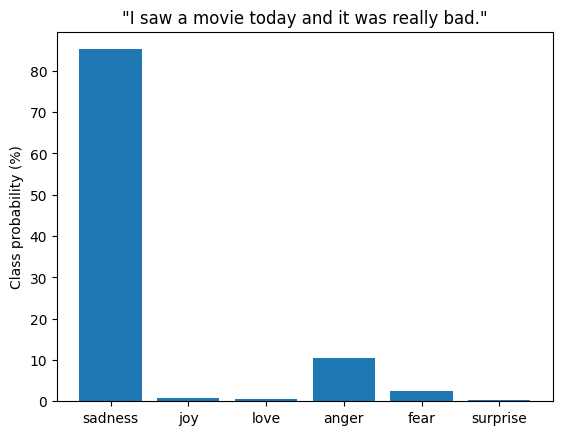

In [85]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()